In [4]:
# Tratamiento de datos
import pandas as pd
import numpy as np


# Visualización
import matplotlib.pyplot as plt
import seaborn as sns


# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV

# skforecast
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from sklearn.metrics import mean_absolute_error
from pmdarima import ARIMA



import warnings
warnings.filterwarnings('ignore')


c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Especifica la ruta relativa al archivo CSV
file_path = '../data/raw/tudato.csv'  # Subiendo un nivel desde la carpeta notebooks

# Lee el archivo CSV en un DataFrame
data = pd.read_csv(file_path)

In [6]:
df = data.copy()

**CUADRO DEFINICIÓN VARIABLES**

|Columna| Descripción | 
|---|----|
|GHI| irradiancia global horizontal/ Potencia fotovoltaica| 
|Gas| precio del gas en el momento de la medición| 
|Festivo| Booleano indicando si el dia del registro era o no domingo/festivo (influye en el precio de la energía)| 
|PotenciaViento| Watios potencia generados por energía eólica| 
|Precios| TARGET - Precio de la energía | 
|Ano| Año del registro| 
|Mes| Mes del registro| 
|Dia| Día del registro| 
|Hora| hora del registro| 
|GMT| zona horaria| 

In [4]:
print(df.shape)
print('-------'*100)
print(df.columns)
print('-------'*100)
df.info()

(67127, 10)
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Index(['GHI', 'Festivo', 'Gas', 'PotenciaViento', 'Precios', 'Ano', 'Mes',
       'Dia', 'Hora', 'GMT'],
      dtype='object')
----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
df

,GHI,Festivo,Gas,PotenciaViento,Precios,Ano,Mes,Dia,Hora,GMT
0,114.000,1,16.93,18104.000,48.55,2016,1,1,0,1
1,114.000,1,16.93,19895.000,40.00,2016,1,1,1,1
2,114.000,1,16.93,21981.000,33.10,2016,1,1,2,1
3,114.000,1,16.93,25509.000,28.11,2016,1,1,3,1
4,114.000,1,16.93,30320.000,27.13,2016,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...
67122,8086.000,0,72.00,11135.500,108.49,2023,8,28,19,2
67123,2393.083,0,72.00,11101.333,133.52,2023,8,28,20,2
67124,782.750,0,72.00,10576.333,138.08,2023,8,28,21,2
67125,674.083,0,72.00,10107.167,123.72,2023,8,28,22,2


In [6]:
df.dtypes

GHI               float64
Festivo             int64
Gas               float64
PotenciaViento    float64
Precios           float64
Ano                 int64
Mes                 int64
Dia                 int64
Hora                int64
GMT                 int64
dtype: object

In [7]:
df.describe()

,GHI,Festivo,Gas,PotenciaViento,Precios,Ano,Mes,Dia,Hora,GMT
count,67127.000000,67127.000000,67127.000000,67127.000000,67127.000000,67127.000000,67127.000000,67127.000000,67127.000000,67127.000000
mean,13871.587354,0.163436,31.736070,36440.008882,74.282599,2019.342455,6.348295,15.713215,11.500142,1.593815
std,23990.607857,0.369766,33.047866,26951.987135,59.264081,2.216534,3.412491,8.792230,6.922193,0.491124
min,-566.000000,0.000000,0.000000,245.250000,0.000000,2016.000000,1.000000,1.000000,0.000000,1.000000
25%,356.000000,0.000000,14.500000,16580.500000,40.690000,2017.000000,3.000000,8.000000,6.000000,1.000000
50%,3832.000000,0.000000,20.000000,30633.000000,53.490000,2019.000000,6.000000,16.000000,12.000000,2.000000
75%,19113.500000,0.000000,29.650000,49866.500000,83.350000,2021.000000,9.000000,23.000000,17.500000,2.000000
max,312107.000000,1.000000,240.000000,236932.000000,700.000000,2023.000000,12.000000,31.000000,23.000000,2.000000


In [7]:
print(df.isnull().sum())
print('-----'*100)
print('Duplicated:', df.duplicated().sum())

GHI               0
Festivo           0
Gas               0
PotenciaViento    0
Precios           0
Ano               0
Mes               0
Dia               0
Hora              0
GMT               0
dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Duplicated: 0


In [8]:
new_col = {'Ano': 'year', 'Mes': 'month', 'Dia': 'day', 'Hora': 'hour'}
df.rename(columns=new_col, inplace=True)
df['datetime'] = pd.to_datetime(df[['year', 'month','day', 'hour']])
# df = df.drop(columns=['year', 'month', 'day', 'hour'])

In [9]:
df.columns

Index(['GHI', 'Festivo', 'Gas', 'PotenciaViento', 'Precios', 'year', 'month',
       'day', 'hour', 'GMT', 'datetime'],
      dtype='object')

In [10]:
df


,GHI,Festivo,Gas,PotenciaViento,Precios,year,month,day,hour,GMT,datetime
0,114.000,1,16.93,18104.000,48.55,2016,1,1,0,1,2016-01-01 00:00:00
1,114.000,1,16.93,19895.000,40.00,2016,1,1,1,1,2016-01-01 01:00:00
2,114.000,1,16.93,21981.000,33.10,2016,1,1,2,1,2016-01-01 02:00:00
3,114.000,1,16.93,25509.000,28.11,2016,1,1,3,1,2016-01-01 03:00:00
4,114.000,1,16.93,30320.000,27.13,2016,1,1,4,1,2016-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...
67122,8086.000,0,72.00,11135.500,108.49,2023,8,28,19,2,2023-08-28 19:00:00
67123,2393.083,0,72.00,11101.333,133.52,2023,8,28,20,2,2023-08-28 20:00:00
67124,782.750,0,72.00,10576.333,138.08,2023,8,28,21,2,2023-08-28 21:00:00
67125,674.083,0,72.00,10107.167,123.72,2023,8,28,22,2,2023-08-28 22:00:00


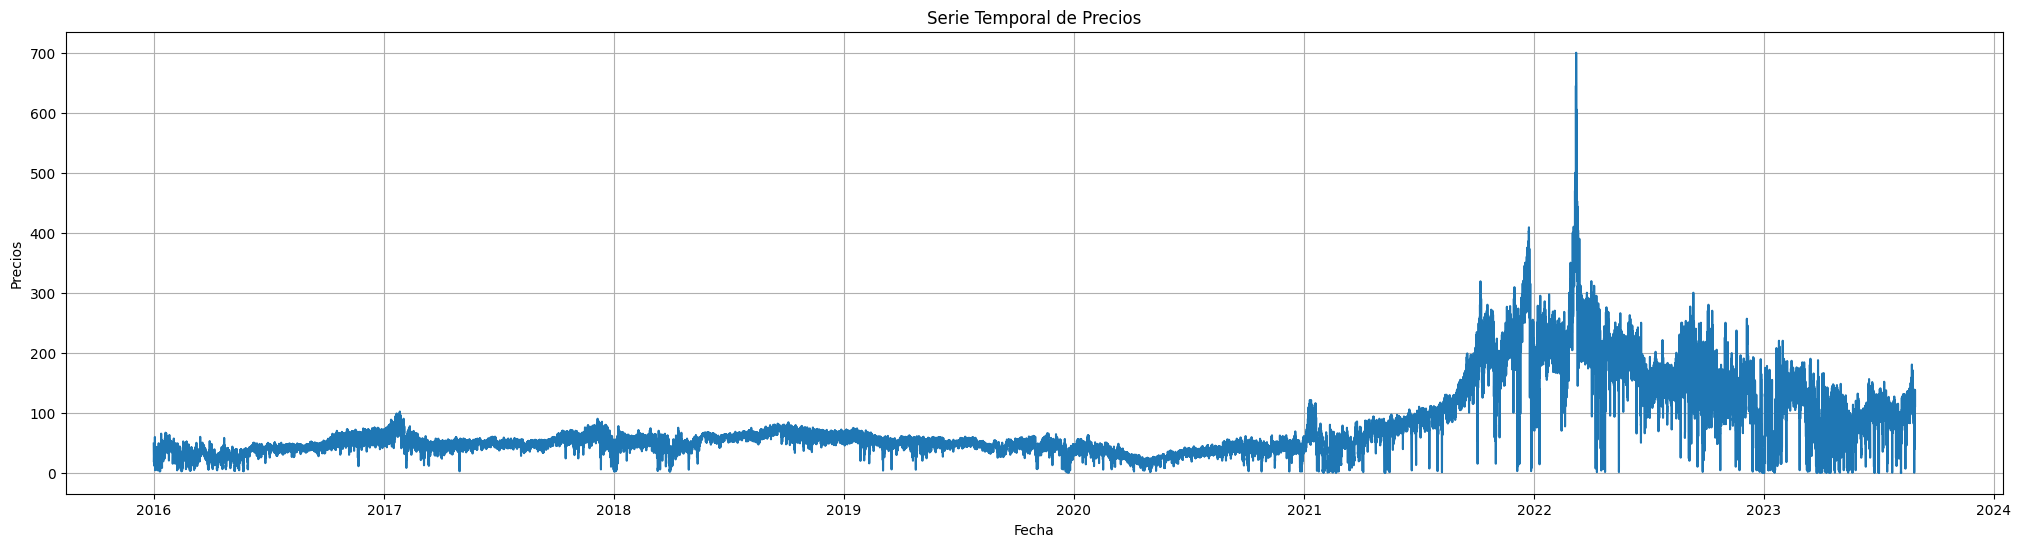

In [12]:
plt.figure(figsize=(25, 6))
plt.plot(df['datetime'], df['Precios'])
plt.title('Serie Temporal de Precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.grid(True)
plt.show()

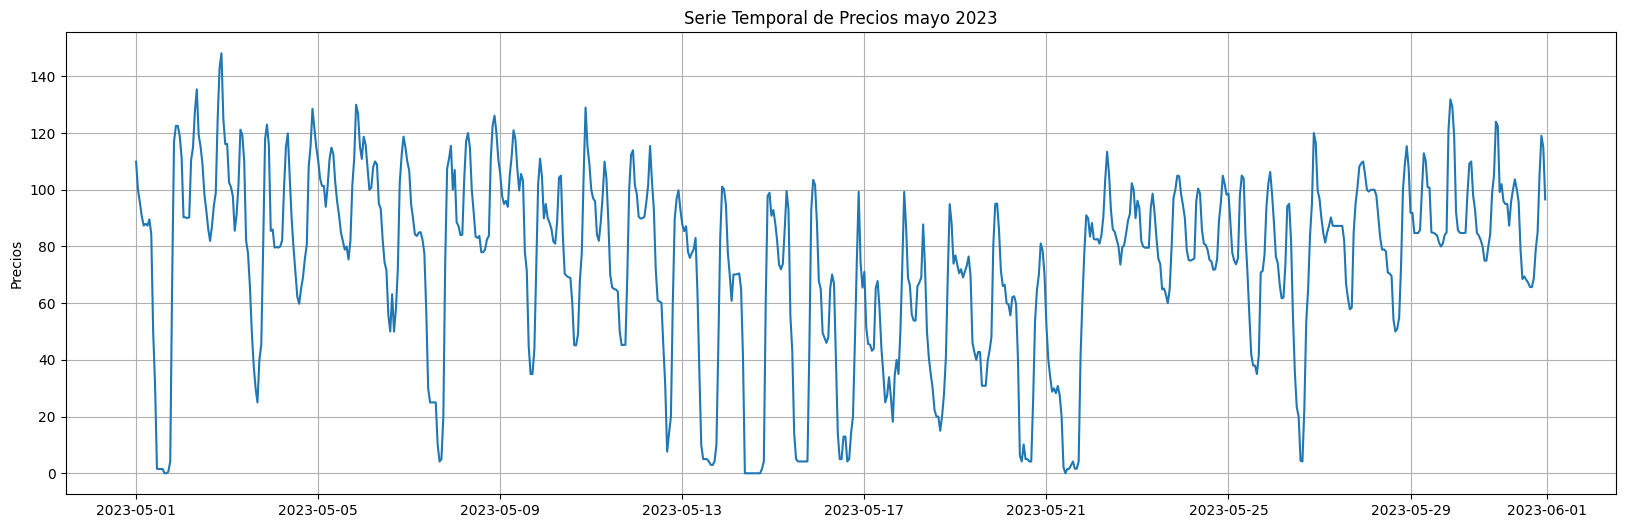

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6), sharex=False)

df_year = df[(df['month'] == 5) & (df['year'] == 2023)]

ax.plot(df_year['datetime'], df_year['Precios'])
ax.set_title(f'Serie Temporal de Precios mayo 2023')
ax.set_ylabel('Precios')
ax.grid(True)

plt.show()

In [11]:

df['day_of_year'] = df['datetime'].dt.dayofyear

df['day_of_year'] = df.groupby('year')['day_of_year'].transform(lambda x: x - x.min() + 1)

In [12]:
df

,GHI,Festivo,Gas,PotenciaViento,Precios,year,month,day,hour,GMT,datetime,day_of_year
0,114.000,1,16.93,18104.000,48.55,2016,1,1,0,1,2016-01-01 00:00:00,1
1,114.000,1,16.93,19895.000,40.00,2016,1,1,1,1,2016-01-01 01:00:00,1
2,114.000,1,16.93,21981.000,33.10,2016,1,1,2,1,2016-01-01 02:00:00,1
3,114.000,1,16.93,25509.000,28.11,2016,1,1,3,1,2016-01-01 03:00:00,1
4,114.000,1,16.93,30320.000,27.13,2016,1,1,4,1,2016-01-01 04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
67122,8086.000,0,72.00,11135.500,108.49,2023,8,28,19,2,2023-08-28 19:00:00,240
67123,2393.083,0,72.00,11101.333,133.52,2023,8,28,20,2,2023-08-28 20:00:00,240
67124,782.750,0,72.00,10576.333,138.08,2023,8,28,21,2,2023-08-28 21:00:00,240
67125,674.083,0,72.00,10107.167,123.72,2023,8,28,22,2,2023-08-28 22:00:00,240


In [16]:
def seasonal_plot(X, y, period, freq, ax=None):
    # Verificar que period y freq sean columnas en X
    assert period in X.columns, f"'{period}' no está en las columnas de X"
    assert freq in X.columns, f"'{freq}' no está en las columnas de X"
    assert y in X.columns, f"'{y}' no está en las columnas de X"

    if ax is None:
        _, ax = plt.subplots()

    palette = sns.color_palette("husl", n_colors=X[period].nunique())

    # Convertir los datos a arrays de NumPy
    x_data = X[freq].values
    y_data = X[y].values
    hue_data = X[period].values

    ax = sns.lineplot(
        x=x_data,
        y=y_data,
        hue=hue_data,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")

    # Ajustar las anotaciones
    unique_periods = np.unique(hue_data)
    for line, name in zip(ax.lines, unique_periods):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )

    return ax

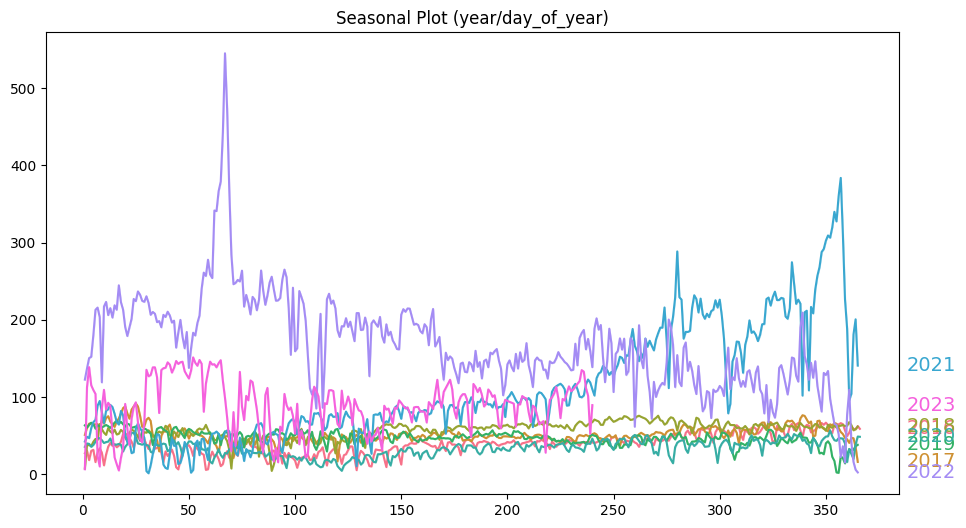

In [17]:

df1 = df.copy()

df1.set_index('datetime', inplace=True)

# Añadir una columna 'day_of_year' que contenga el día del año para cada fecha
df1["day_of_year"] = df1.index.day_of_year

# Añadir una columna 'year' que contenga el año para cada fecha
df1["year"] = df1.index.year

# Crear la figura y los subplots
fig, ax = plt.subplots(1, 1, figsize=(11, 6))

# Trazar el gráfico estacional
seasonal_plot(df1, y="Precios", period="year", freq="day_of_year", ax=ax)

# Asegurarse de mostrar la figura
plt.show()

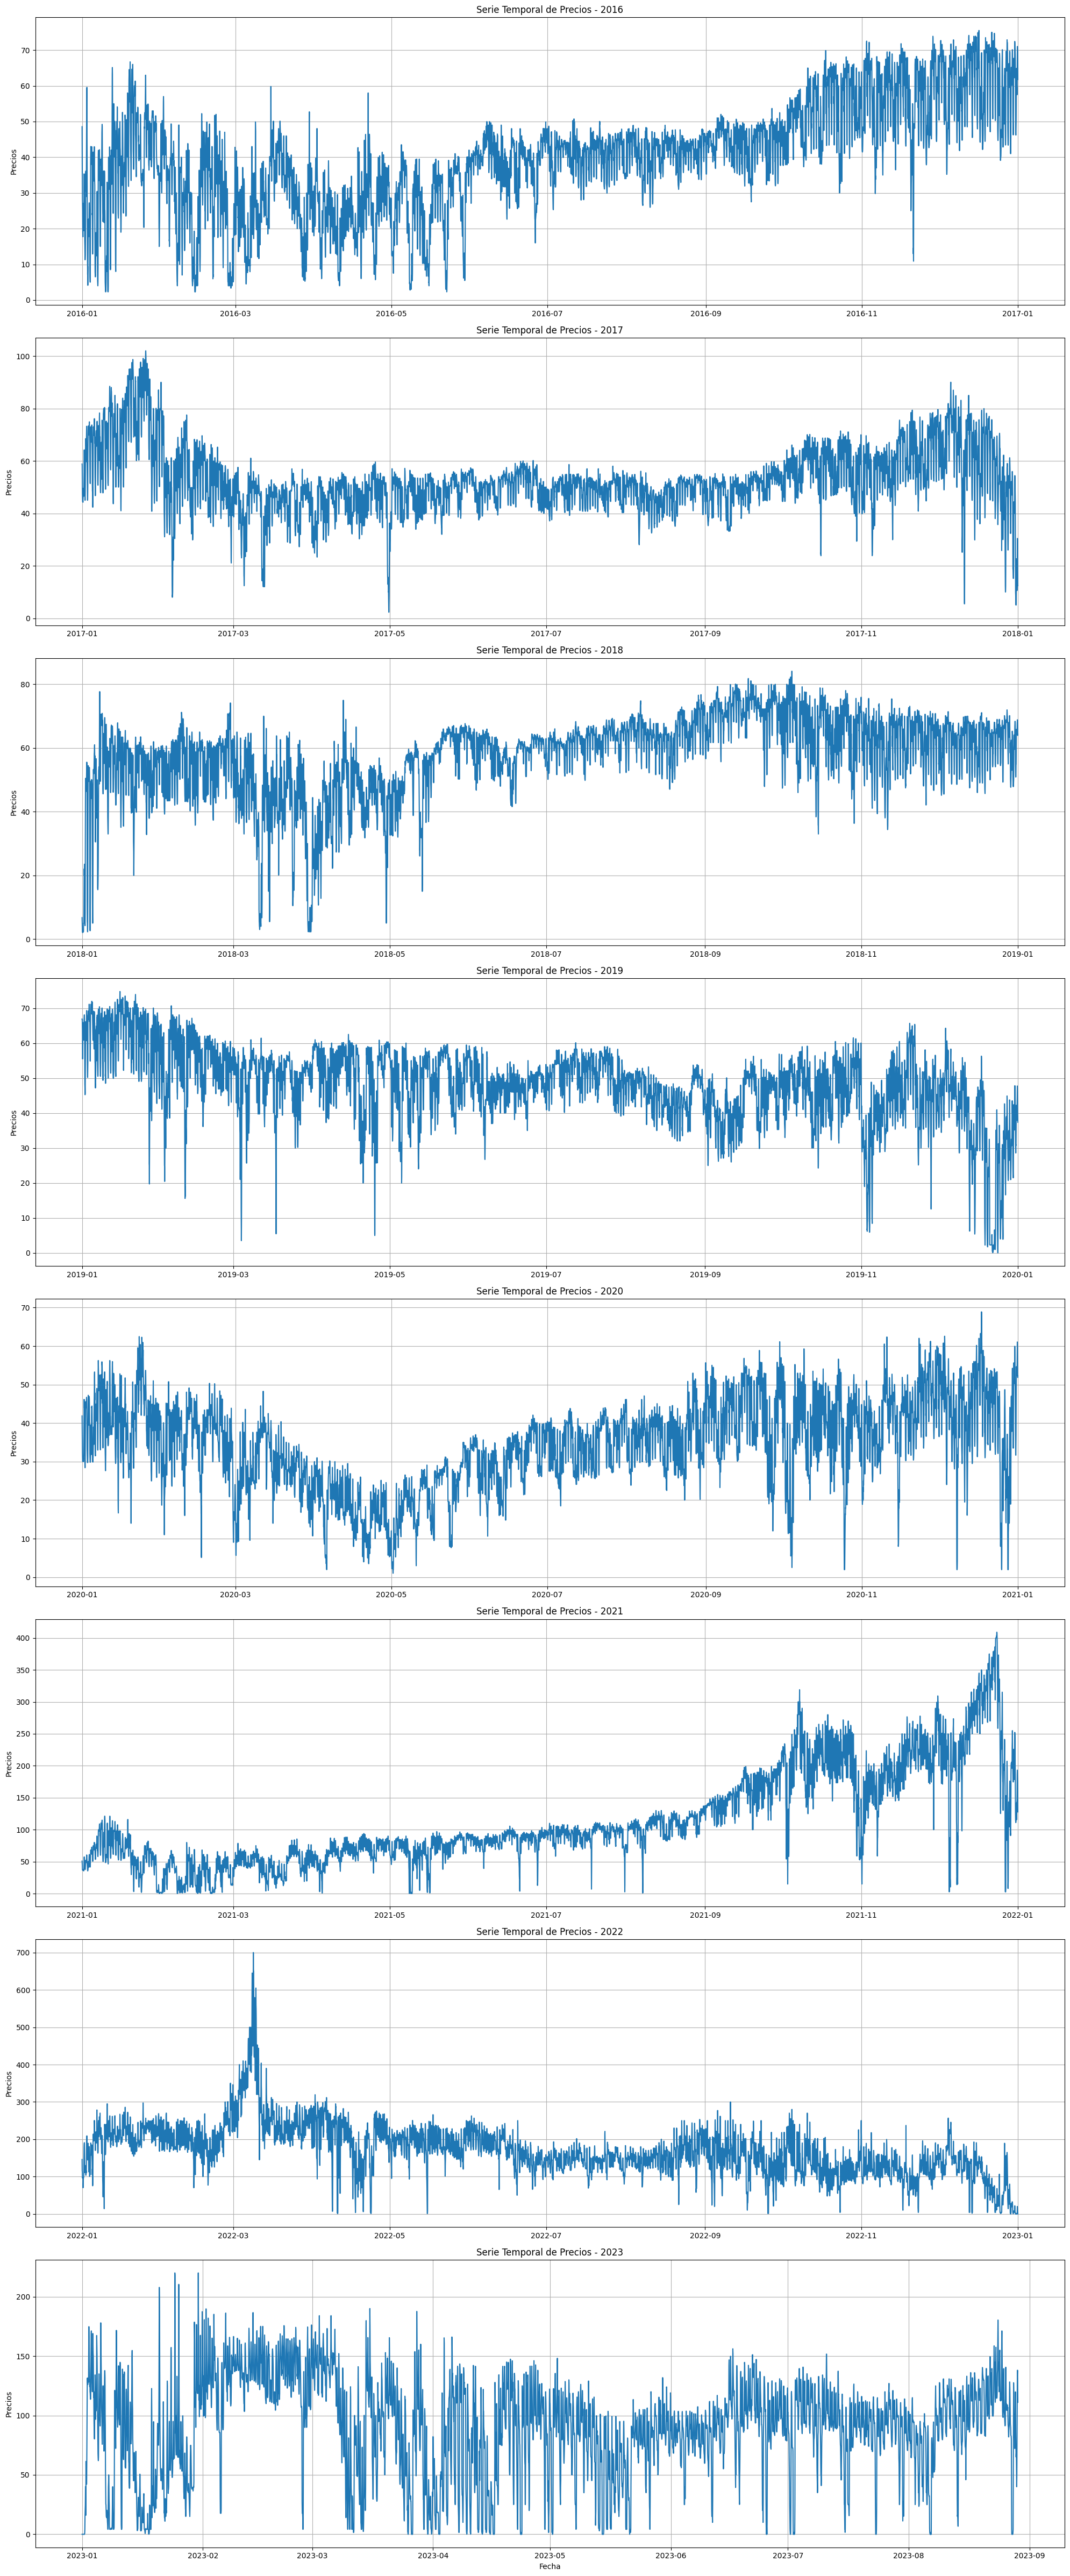

In [18]:
df['year'] = df['datetime'].dt.year

# Obtener los años únicos en el DataFrame
years = df['year'].unique()

# tamaño del gráfico
fig, axs = plt.subplots(len(years), 1, figsize=(20, 6*len(years)), sharex=False)

# Iterar sobre cada año y graficar
for i, year in enumerate(years):
    df_year = df[df['year'] == year]
    axs[i].plot(df_year['datetime'], df_year['Precios'])
    axs[i].set_title(f'Serie Temporal de Precios - {year}')
    axs[i].set_ylabel('Precios')
    axs[i].grid(True)

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()

In [19]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

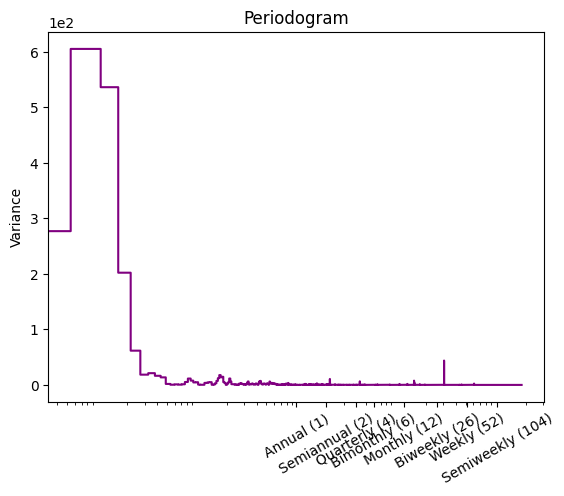

In [20]:
plot_periodogram(df1['Precios'])

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [14]:
df2 = pd.Series(df['Precios'].values, index=df['datetime'])
df2

datetime
2016-01-01 00:00:00     48.55
2016-01-01 01:00:00     40.00
2016-01-01 02:00:00     33.10
2016-01-01 03:00:00     28.11
2016-01-01 04:00:00     27.13
                        ...  
2023-08-28 19:00:00    108.49
2023-08-28 20:00:00    133.52
2023-08-28 21:00:00    138.08
2023-08-28 22:00:00    123.72
2023-08-28 23:00:00    111.08
Length: 67127, dtype: float64

Test estacionariedad serie original
-------------------------------------


ADF Statistic: -5.947547831709342, p-value: 2.1859909675353553e-07
KPSS Statistic: 17.11029737480388, p-value: 0.01

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -42.95828626958498, p-value: 0.0
KPSS Statistic: 0.02686913174244417, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -59.858467771039244, p-value: 0.0
KPSS Statistic: 0.005492831701150309, p-value: 0.1


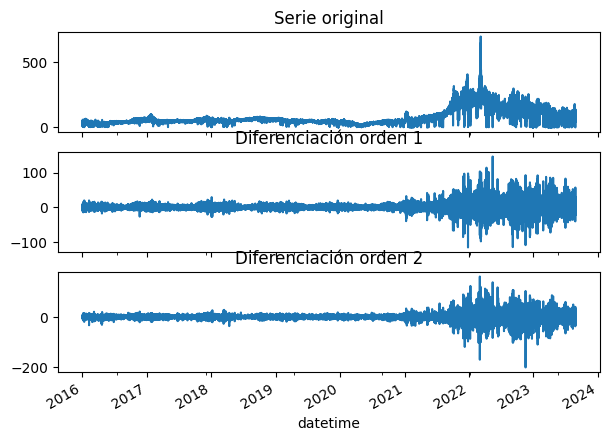

In [23]:
# Test estacionariedad
# ==============================================================================
datos_diff_1 = df2.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(df2)
kpss_result = kpss(df2)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(df2.diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(df2.diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")

# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 5), sharex=True)
df2.plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

In [24]:
# ESTO ANTERIOR QUIERE DECICR QUE EL ARIMA D=1
# ahora vamos a ver p 1  y q = 3

Text(0.5, 1.0, 'Autocorrelación serie diferenciada (order=2)')

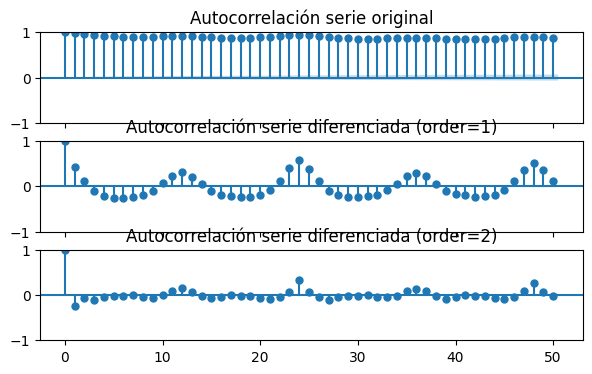

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 4), sharex=True)
plot_acf(df2, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelación serie original')
plot_acf(datos_diff_1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Autocorrelación serie diferenciada (order=1)')
plot_acf(datos_diff_2, ax=axs[2], lags=50, alpha=0.05)
axs[2].set_title('Autocorrelación serie diferenciada (order=2)')

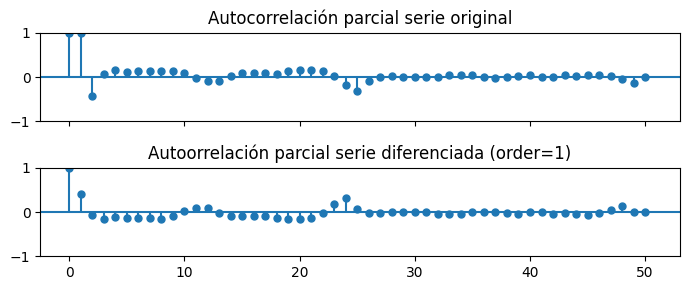

In [26]:
# Autocorrelación parcial para la serie original y la serie diferenciada
# ==============================================================================
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 3), sharex=True)
plot_pacf(df2, ax=axs[0], lags=50, alpha=0.05)
axs[0].set_title('Autocorrelación parcial serie original')
plot_pacf(datos_diff_1, ax=axs[1], lags=50, alpha=0.05)
axs[1].set_title('Autoorrelación parcial serie diferenciada (order=1)');
plt.tight_layout();

In [15]:
df2

datetime
2016-01-01 00:00:00     48.55
2016-01-01 01:00:00     40.00
2016-01-01 02:00:00     33.10
2016-01-01 03:00:00     28.11
2016-01-01 04:00:00     27.13
                        ...  
2023-08-28 19:00:00    108.49
2023-08-28 20:00:00    133.52
2023-08-28 21:00:00    138.08
2023-08-28 22:00:00    123.72
2023-08-28 23:00:00    111.08
Length: 67127, dtype: float64

In [14]:
df2.info()


<class 'pandas.core.series.Series'>
DatetimeIndex: 67127 entries, 2016-01-01 00:00:00 to 2023-08-28 23:00:00
Series name: None
Non-Null Count  Dtype  
--------------  -----  
67127 non-null  float64
dtypes: float64(1)
memory usage: 1.0 MB


In [16]:
df2_df=  pd.DataFrame(df2)
df2_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67127 entries, 2016-01-01 00:00:00 to 2023-08-28 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       67127 non-null  float64
dtypes: float64(1)
memory usage: 1.0 MB


In [17]:
# Drop duplicate index labels
df2_df = df2_df[~df2_df.index.duplicated()]

# Now, reindex with hourly frequency
df2_df = df2_df.asfreq('H')
df2_df.rename(columns={0: 'values'}, inplace=True)
df2_df.fillna(0, inplace=True)

In [18]:
split_date = '2022-12-31'
split_index = pd.to_datetime(split_date)
df2_train = df2.loc[df2.index <= split_index]
df2_test = df2.loc[df2.index > split_index]

In [19]:
df2_df.to_csv('serie_temporal.csv',sep=',')

AttributeError: 'Index' object has no attribute '_format_native_types'

In [22]:
# Luego, procedemos con el código del backtesting
forecaster = ForecasterSarimax(
                 regressor=Sarimax(
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                maxiter=200
                            )
             )

forecaster.fit(y=df2_df['values'], suppress_warnings=True)
# predictions = forecaster.predict(steps=36)

metrica, predictions = backtesting_sarimax(
                            forecaster            = forecaster,
                            y                     = df2_df['values'],
                            initial_train_size    = len(df2_train),
                            fixed_train_size      = False,
                            steps                 = 120,
                            metric                = 'mean_absolute_error',
                            refit                 = True,
                            n_jobs                = 'auto',
                            suppress_warnings_fit = True,
                            verbose               = True,
                            show_progress         = True
                        )

print(f"Metrica (mean absolute error): {metrica}")

predictions.head()

Information of backtesting process
----------------------------------
Number of observations used for initial training: 61345
Number of observations used for backtesting: 5783
    Number of folds: 49
    Number of steps per fold: 120
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 23 observations.

Fold: 0
    Training:   2016-01-01 00:00:00 -- 2022-12-31 00:00:00  (n=61345)
    Validation: 2022-12-31 01:00:00 -- 2023-01-05 00:00:00  (n=120)
Fold: 1
    Training:   2016-01-01 00:00:00 -- 2023-01-05 00:00:00  (n=61465)
    Validation: 2023-01-05 01:00:00 -- 2023-01-10 00:00:00  (n=120)
Fold: 2
    Training:   2016-01-01 00:00:00 -- 2023-01-10 00:00:00  (n=61585)
    Validation: 2023-01-10 01:00:00 -- 2023-01-15 00:00:00  (n=120)
Fold: 3
    Training:   2016-01-01 00:00:00 -- 2023-01-15 00:00:00  (n=61705)
    Validation: 2023-01-15 01:00:00 -- 2023-01-20 00:00:00  (n=120)
Fold: 4
    Training:   2016-01-01 00:00:00 -- 2023-0

100%|██████████| 49/49 [28:55<00:00, 35.43s/it]
c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python311\Lib\site-pa

Metrica (mean absolute error): 33.795632070355474


C:\Users\Mega Tecnologia\AppData\Roaming\Python\Python311\site-packages\IPython\core\formatters.py:347: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\Mega Tecnologia\AppData\Roaming\Python\Python311\site-packages\IPython\core\formatters.py:347: FutureWarning: DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,pred
2022-12-31 01:00:00,-2.895138
2022-12-31 02:00:00,-6.328714
2022-12-31 03:00:00,-6.422908
2022-12-31 04:00:00,-1.727281
2022-12-31 05:00:00,9.679014


In [23]:
import pickle

with open('forecaster_model.pkl', 'wb') as archivo:
    pickle.dump(forecaster, archivo)

In [25]:
# Luego, procedemos con el código del backtesting
forecaster = ForecasterSarimax(
                 regressor=Sarimax(
                                order=(1, 1, 1),
                                seasonal_order=(1, 2, 1, 12),
                                maxiter=200
                            )
             )

forecaster.fit(y=df2_df['values'], suppress_warnings=True)
predictions = forecaster.predict(steps=36)

# metrica, predictions = backtesting_sarimax(
#                             forecaster            = forecaster,
#                             y                     = df2_df['values'],
#                             initial_train_size    = len(df2_train),
#                             fixed_train_size      = False,
#                             steps                 = 120,
#                             metric                = 'mean_absolute_error',
#                             refit                 = True,
#                             n_jobs                = 'auto',
#                             suppress_warnings_fit = True,
#                             verbose               = True,
#                             show_progress         = True
#                         )

print(f"Metrica (mean absolute error): {metrica}")

predictions.head()

Metrica (mean absolute error): 33.795632070355474


2023-08-29 00:00:00    101.798095
2023-08-29 01:00:00     99.464010
2023-08-29 02:00:00     96.110485
2023-08-29 03:00:00     88.400500
2023-08-29 04:00:00     79.414778
Freq: h, Name: pred, dtype: float64

In [26]:
import pickle

with open('forecaster_model2.pkl', 'wb') as archivo:
    pickle.dump(forecaster, archivo)

In [ ]:
import pickle

# Cargar el modelo desde el archivo pickle
with open('forecaster_model.pkl', 'rb') as archivo:
    forecaster_cargado = pickle.load(archivo)

# Ahora puedes usar 'forecaster_cargado' para hacer predicciones
predicciones = forecaster_cargado.predict(fh=ForecastingHorizon(range(1, 121)))
print(predicciones)

In [ ]:
# fig, ax=plt.subplots(figsize=(7, 3))
# df2_train.plot(ax=ax, label='train')
# df2_test.plot(ax=ax, label='test')
# predictions.plot(ax=ax, label='predictions')
# ax.legend();

<Axes: >

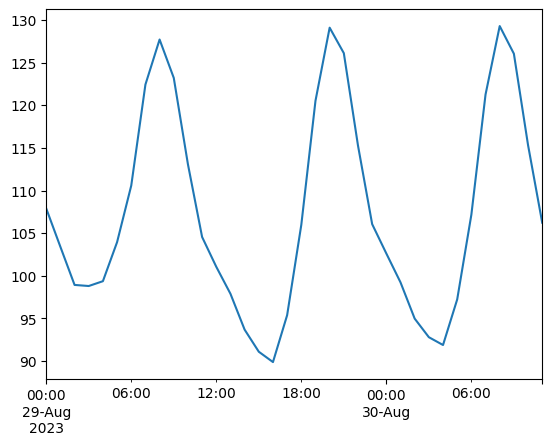

In [73]:
predictions.plot() #estas son del modelo simple

In [20]:
# Grid search hyperparameter
# ======================================================================================
forecaster = ForecasterSarimax(
                 regressor=Sarimax(
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                maxiter=200
                            )
             )

param_grid = {
    'order': [(2, 1, 0), (5, 1, 1), (8, 1, 4)],
    'seasonal_order': [(0, 0, 0, 0)],
    'trend': [None, 'n', 'c']
}

results_grid = grid_search_sarimax(
                   forecaster         = forecaster,
                   y                  = df2_df['values'],
                   param_grid         = param_grid,
                   steps              = 168,
                   refit              = True,
                   metric             = 'mean_absolute_error',
                   initial_train_size = len(df2_train),
                   fixed_train_size   = False,
                   return_best        = True,
                   n_jobs             = 'auto',
                   verbose            = True,
                   show_progress      = True
               )

results_grid.head(5)

Number of models compared: 9.


params grid:   0%|          | 0/9 [00:00<?, ?it/s]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 61345
Number of observations used for backtesting: 5783
    Number of folds: 35
    Number of steps per fold: 168
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 71 observations.

Fold: 0
    Training:   2016-01-01 00:00:00 -- 2022-12-31 00:00:00  (n=61345)
    Validation: 2022-12-31 01:00:00 -- 2023-01-07 00:00:00  (n=168)
Fold: 1
    Training:   2016-01-01 00:00:00 -- 2023-01-07 00:00:00  (n=61513)
    Validation: 2023-01-07 01:00:00 -- 2023-01-14 00:00:00  (n=168)
Fold: 2
    Training:   2016-01-01 00:00:00 -- 2023-01-14 00:00:00  (n=61681)
    Validation: 2023-01-14 01:00:00 -- 2023-01-21 00:00:00  (n=168)
Fold: 3
    Training:   2016-01-01 00:00:00 -- 2023-01-21 00:00:00  (n=61849)
    Validation: 2023-01-21 01:00:00 -- 2023-01-28 00:00:00  (n=168)
Fold: 4
    Training:   2016-01-01 00:00:00 -- 2023-0

params grid:  11%|█         | 1/9 [00:37<05:00, 37.61s/it]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 61345
Number of observations used for backtesting: 5783
    Number of folds: 35
    Number of steps per fold: 168
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 71 observations.

Fold: 0
    Training:   2016-01-01 00:00:00 -- 2022-12-31 00:00:00  (n=61345)
    Validation: 2022-12-31 01:00:00 -- 2023-01-07 00:00:00  (n=168)
Fold: 1
    Training:   2016-01-01 00:00:00 -- 2023-01-07 00:00:00  (n=61513)
    Validation: 2023-01-07 01:00:00 -- 2023-01-14 00:00:00  (n=168)
Fold: 2
    Training:   2016-01-01 00:00:00 -- 2023-01-14 00:00:00  (n=61681)
    Validation: 2023-01-14 01:00:00 -- 2023-01-21 00:00:00  (n=168)
Fold: 3
    Training:   2016-01-01 00:00:00 -- 2023-01-21 00:00:00  (n=61849)
    Validation: 2023-01-21 01:00:00 -- 2023-01-28 00:00:00  (n=168)
Fold: 4
    Training:   2016-01-01 00:00:00 -- 2023-0

params grid:  22%|██▏       | 2/9 [01:15<04:22, 37.50s/it]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 61345
Number of observations used for backtesting: 5783
    Number of folds: 35
    Number of steps per fold: 168
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 71 observations.

Fold: 0
    Training:   2016-01-01 00:00:00 -- 2022-12-31 00:00:00  (n=61345)
    Validation: 2022-12-31 01:00:00 -- 2023-01-07 00:00:00  (n=168)
Fold: 1
    Training:   2016-01-01 00:00:00 -- 2023-01-07 00:00:00  (n=61513)
    Validation: 2023-01-07 01:00:00 -- 2023-01-14 00:00:00  (n=168)
Fold: 2
    Training:   2016-01-01 00:00:00 -- 2023-01-14 00:00:00  (n=61681)
    Validation: 2023-01-14 01:00:00 -- 2023-01-21 00:00:00  (n=168)
Fold: 3
    Training:   2016-01-01 00:00:00 -- 2023-01-21 00:00:00  (n=61849)
    Validation: 2023-01-21 01:00:00 -- 2023-01-28 00:00:00  (n=168)
Fold: 4
    Training:   2016-01-01 00:00:00 -- 2023-0

params grid:  33%|███▎      | 3/9 [02:30<05:28, 54.71s/it]

Information of backtesting process
----------------------------------
Number of observations used for initial training: 61345
Number of observations used for backtesting: 5783
    Number of folds: 35
    Number of steps per fold: 168
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 71 observations.

Fold: 0
    Training:   2016-01-01 00:00:00 -- 2022-12-31 00:00:00  (n=61345)
    Validation: 2022-12-31 01:00:00 -- 2023-01-07 00:00:00  (n=168)
Fold: 1
    Training:   2016-01-01 00:00:00 -- 2023-01-07 00:00:00  (n=61513)
    Validation: 2023-01-07 01:00:00 -- 2023-01-14 00:00:00  (n=168)
Fold: 2
    Training:   2016-01-01 00:00:00 -- 2023-01-14 00:00:00  (n=61681)
    Validation: 2023-01-14 01:00:00 -- 2023-01-21 00:00:00  (n=168)
Fold: 3
    Training:   2016-01-01 00:00:00 -- 2023-01-21 00:00:00  (n=61849)
    Validation: 2023-01-21 01:00:00 -- 2023-01-28 00:00:00  (n=168)
Fold: 4
    Training:   2016-01-01 00:00:00 -- 2023-0

params grid:  33%|███▎      | 3/9 [04:29<08:58, 89.81s/it]


KeyboardInterrupt: 

In [ ]:
print(f"Error backtest: {metric}")
predictions.head(4)


### REDES NEURONALES

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [ ]:
# # Escalar los datos
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Crear el modelo de red neuronal
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     Dense(32, activation='relu'),
#     Dense(1)  # Capa de salida con una neurona para la regresión
# ])

# # Compilar el modelo
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Entrenar el modelo
# history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=50, validation_split=0.2)

# # early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, )
# # history = model.fit(X_train,
# #                    y_train,
# #                    epochs=50,
# #                     validation_data = (X_valid, y_valid),
# #                    callbacks = [early_stopping_cb])

# # Evaluar el modelo
# loss = model.evaluate(X_test_scaled, y_test)
# print(f'Loss en el conjunto de prueba: {loss}')

# # Obtener predicciones
# predictions = model.predict(X_test_scaled)

### Exportar modelo


In [ ]:
# import pickle

# with open('finished_model.model', "wb") as archivo_salida:
#     pickle.dump(models_gridsearch['reg_log'].best_estimator_, archivo_salida)




    